Downloading...
From: https://drive.google.com/uc?id=1lKutDEbNwVsLKGaLV-FVIx0E3flvgTPG
To: /content/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 1.45MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iUBOSSMGZdf-by9CW3KWq3Bp9ndw2Uig
To: /content/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 58.7MB/s]


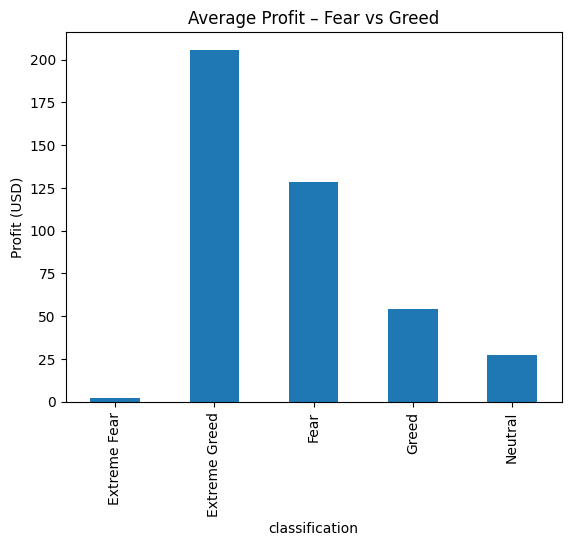

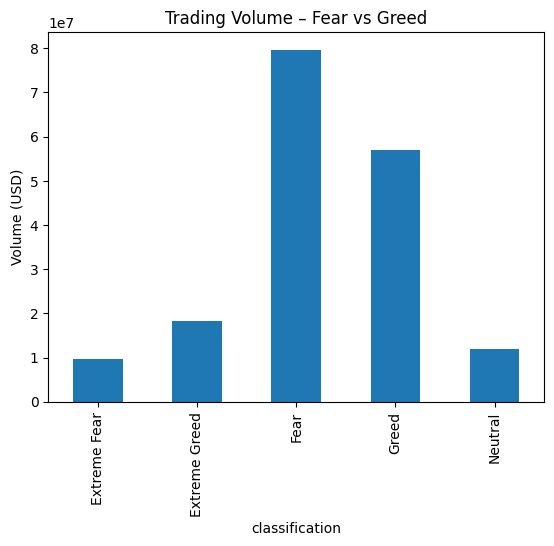

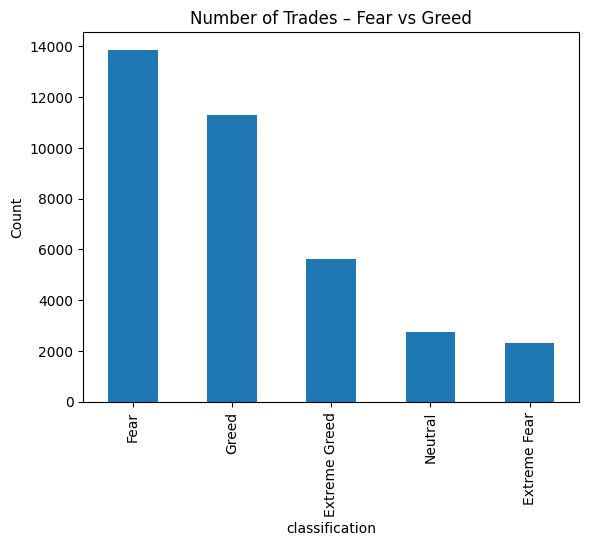

In [9]:
!pip install gdown
import gdown

# download Fear/Greed CSV
fear_id = "1lKutDEbNwVsLKGaLV-FVIx0E3flvgTPG"
gdown.download(f"https://drive.google.com/uc?id={fear_id}", "fear_greed.csv", quiet=False)

# download Trader data CSV
trader_id = "1iUBOSSMGZdf-by9CW3KWq3Bp9ndw2Uig"
gdown.download(f"https://drive.google.com/uc?id={trader_id}", "trader_data.csv", quiet=False)

import pandas as pd

sentiment = pd.read_csv("fear_greed.csv")
trader = pd.read_csv("trader_data.csv", low_memory=False)

sentiment.head(), trader.head()
sentiment['date'] = pd.to_datetime(sentiment['timestamp'], unit='s').dt.date
# Convert Timestamp IST to date
trader['date'] = pd.to_datetime(trader['Timestamp IST'], errors='coerce').dt.date
merged = trader.merge(sentiment[['date', 'classification']], on='date', how='left')
merged.head()
merged = merged.rename(columns={
    "Closed PnL": "closedPnL",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Execution Price": "execution_price",
    "Timestamp IST": "timestamp_ist"
})
merged.groupby("classification")["closedPnL"].mean()
merged.groupby("classification")["size_usd"].sum()
merged["classification"].value_counts()
import matplotlib.pyplot as plt

# Profit graph
merged.groupby('classification')['closedPnL'].mean().plot(kind='bar')
plt.title("Average Profit – Fear vs Greed")
plt.ylabel("Profit (USD)")
plt.savefig("profit_sentiment.png")
plt.show()

# Volume graph
merged.groupby('classification')['size_usd'].sum().plot(kind='bar')
plt.title("Trading Volume – Fear vs Greed")
plt.ylabel("Volume (USD)")
plt.savefig("volume_sentiment.png")
plt.show()

# Count graph
merged['classification'].value_counts().plot(kind='bar')
plt.title("Number of Trades – Fear vs Greed")
plt.ylabel("Count")
plt.savefig("trade_count_sentiment.png")
plt.show()
merged.to_csv("merged_data.csv", index=False)






